# Agrupamento

In [25]:
import pandas as pd
import os

caminho_arquivo_csv = os.path.join(os.path.dirname('03 - Projeto'), '..', '..', 'datasets')
df = pd.read_csv( os.path.join(caminho_arquivo_csv, 'filmes_total.csv'))

data = df[['porcentagem_non_white', 'porcentagem_mulheres', 'media_idade', 'category']]

data.dropna(subset=['porcentagem_non_white'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1962 entries, 0 to 2218
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   porcentagem_non_white  1962 non-null   float64
 1   porcentagem_mulheres   1962 non-null   float64
 2   media_idade            1962 non-null   float64
 3   category               1962 non-null   object 
dtypes: float64(3), object(1)
memory usage: 76.6+ KB


/var/folders/5j/9jv9r0ms4jbb9djd11zfg91m0000gn/T/ipykernel_17630/3357984732.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['porcentagem_non_white'], inplace=True)


In [30]:
from sklearn.cluster import KMeans

X = data[['porcentagem_non_white', 'media_idade', 'porcentagem_mulheres']]

kmeans = KMeans(n_clusters=3, random_state=0)

data['cluster'] = kmeans.fit_predict(X)

/var/folders/5j/9jv9r0ms4jbb9djd11zfg91m0000gn/T/ipykernel_17630/1172181538.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.fit_predict(X)


In [31]:
cluster_analysis = data.groupby(['cluster', 'category']).size().unstack(fill_value=0)
print(cluster_analysis)

cluster_percentages = cluster_analysis.div(cluster_analysis.sum(axis=1), axis=0)
print(cluster_percentages)

category  actor in a leading role  actor in a supporting role  \
cluster                                                         
0                              36                          32   
1                              56                          65   
2                              16                          13   

category  actress in a leading role  actress in a supporting role  \
cluster                                                             
0                                71                            66   
1                                28                            31   
2                                 6                            13   

category  animated feature film  art direction  best picture  cinematography  \
cluster                                                                        
0                            17             19            61              33   
1                            39             32            75              57   
2       

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot da porcentagem de não brancos vs média de idade, colorido por cluster
plt.figure(figsize=(14, 7))
sns.scatterplot(data=data, x='porcentagem_non_white', y='media_idade', hue='cluster', palette='viridis', style='category', s=100)
plt.title('Porcentagem de Não Brancos vs Média de Idade (Colorido por Cluster)')
plt.xlabel('Porcentagem de Não Brancos')
plt.ylabel('Média de Idade')
plt.legend(title='Cluster')
plt.show()

# Scatter plot da porcentagem de mulheres vs média de idade, colorido por cluster
plt.figure(figsize=(14, 7))
sns.scatterplot(data=data, x='porcentagem_mulheres', y='media_idade', hue='cluster', palette='viridis', style='category', s=100)
plt.title('Porcentagem de Mulheres vs Média de Idade (Colorido por Cluster)')
plt.xlabel('Porcentagem de Mulheres')
plt.ylabel('Média de Idade')
plt.legend(title='Cluster')
plt.show()


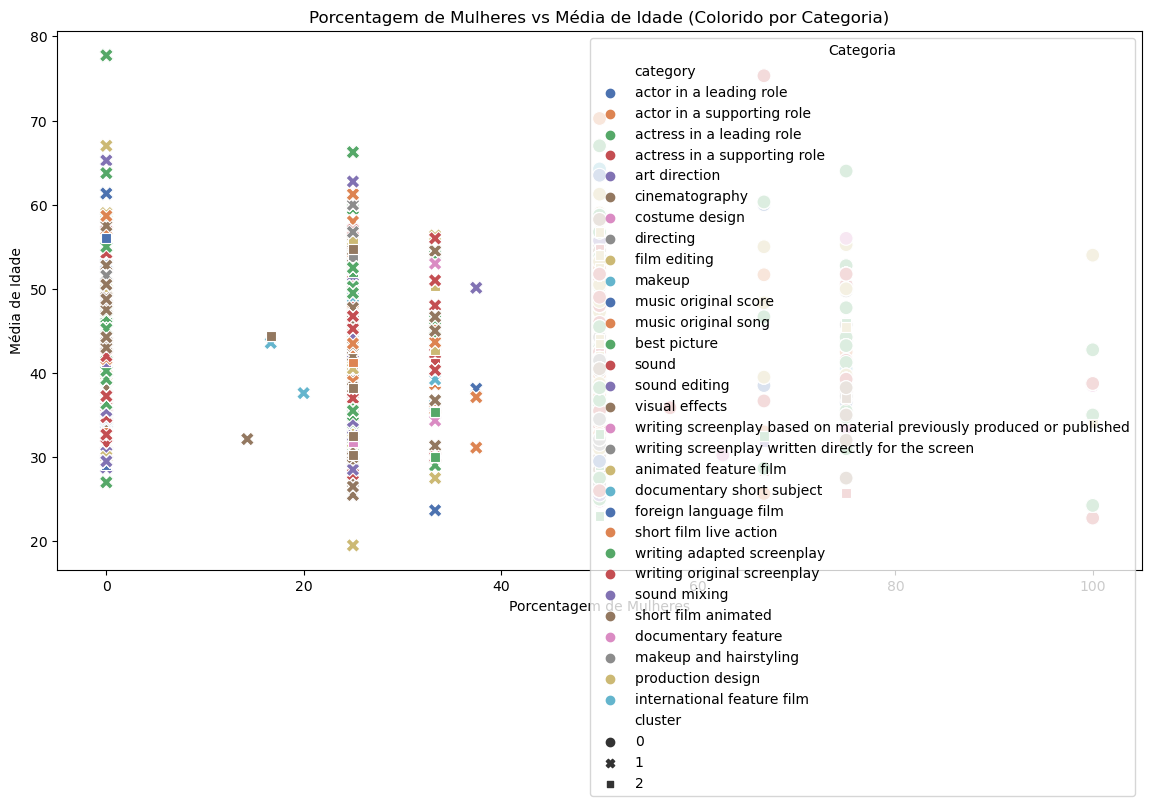

In [41]:
# Scatter plot da porcentagem de não brancos vs média de idade, colorido por categoria
plt.figure(figsize=(14, 7))
sns.scatterplot(data=data, x='media_idade', y='category', hue='porcentagem_non_white', palette='deep', style='cluster', s=100)
plt.title('Porcentagem de Não Brancos vs Média de Idade (Colorido por Categoria)')
plt.xlabel('Porcentagem de Não Brancos')
plt.ylabel('Média de Idade')
plt.legend(title='Categoria')
plt.show()

# Scatter plot da porcentagem de mulheres vs média de idade, colorido por categoria
plt.figure(figsize=(14, 7))
sns.scatterplot(data=data, x='porcentagem_mulheres', y='media_idade', hue='category', palette='deep', style='cluster', s=100)
plt.title('Porcentagem de Mulheres vs Média de Idade (Colorido por Categoria)')
plt.xlabel('Porcentagem de Mulheres')
plt.ylabel('Média de Idade')
plt.legend(title='Categoria')
plt.show()

/var/folders/5j/9jv9r0ms4jbb9djd11zfg91m0000gn/T/ipykernel_17630/1151367245.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='porcentagem_mulheres', y='category', ci=None)


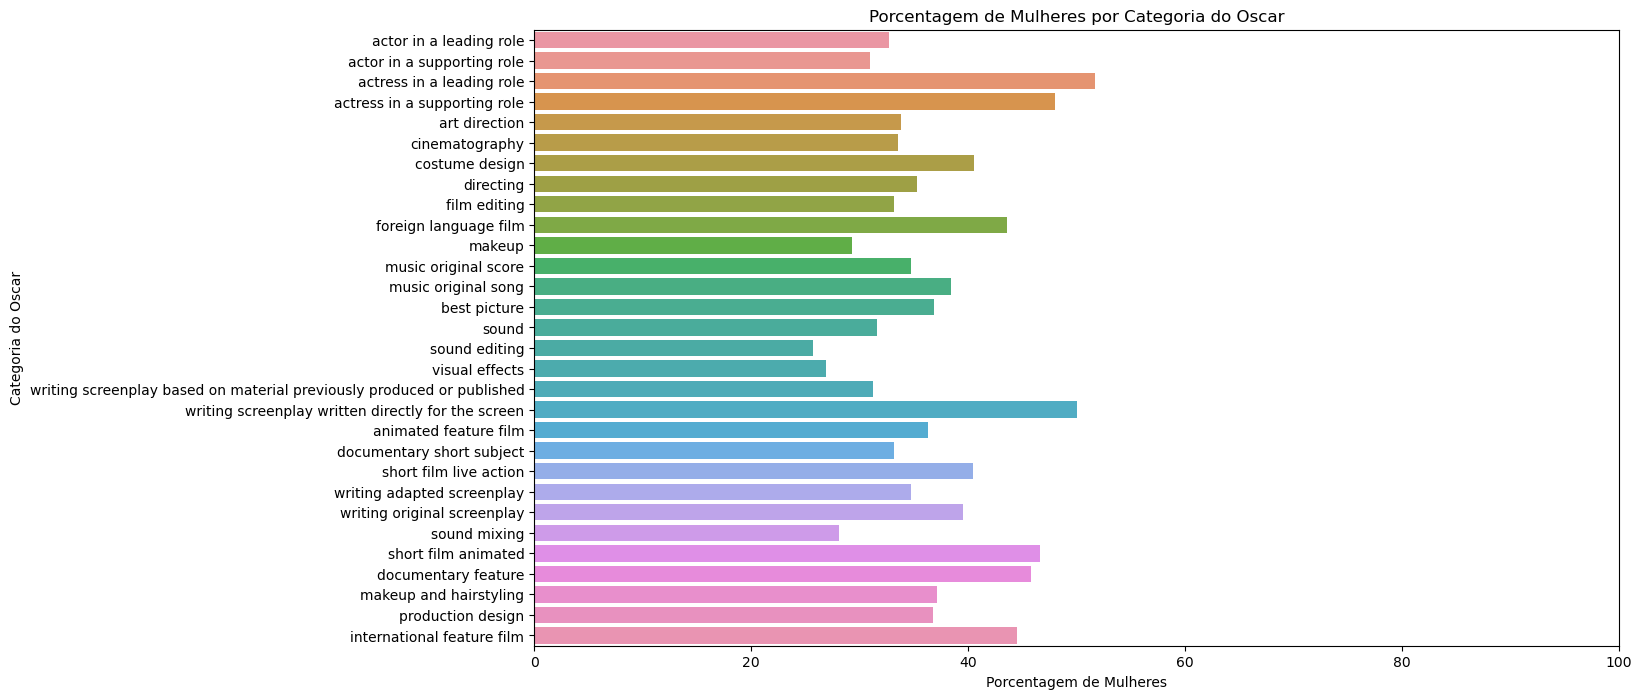

In [42]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='porcentagem_mulheres', y='category', ci=None)
plt.title('Porcentagem de Mulheres por Categoria do Oscar')
plt.xlabel('Porcentagem de Mulheres')
plt.ylabel('Categoria do Oscar')
plt.xlim(0, 100)
plt.show()

/var/folders/5j/9jv9r0ms4jbb9djd11zfg91m0000gn/T/ipykernel_17630/3390278298.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='porcentagem_non_white', y='category', ci=None)


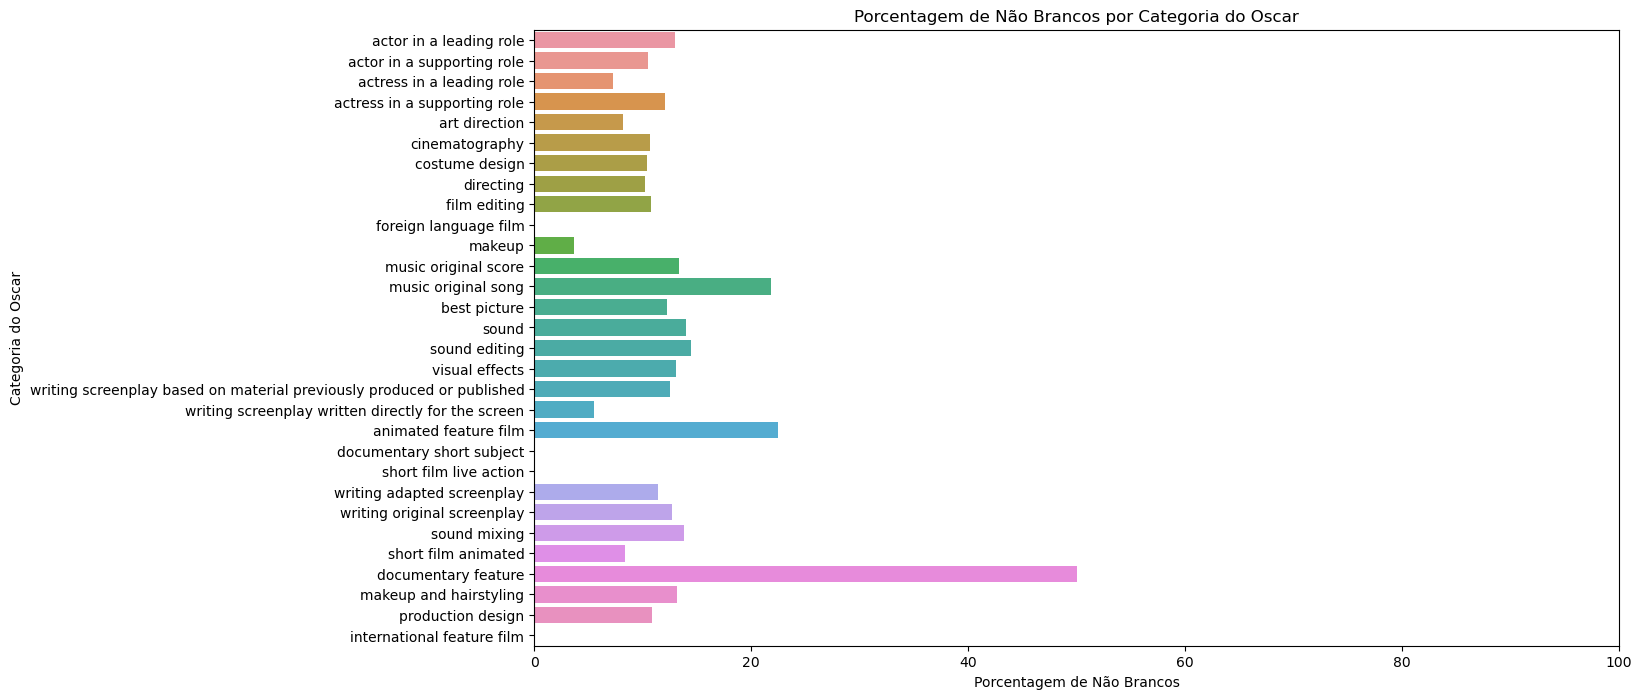

In [44]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='porcentagem_non_white', y='category', ci=None)
plt.title('Porcentagem de Não Brancos por Categoria do Oscar')
plt.xlabel('Porcentagem de Não Brancos')
plt.ylabel('Categoria do Oscar')
plt.xlim(0, 100)  # Limitar o eixo x de 0 a 100
plt.show()

In [45]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='media_idade', y='category', ci=None)
plt.title('Média de Idades por Categoria do Oscar')
plt.xlabel('Média de Idades')
plt.ylabel('Categoria do Oscar')
plt.show()

/var/folders/5j/9jv9r0ms4jbb9djd11zfg91m0000gn/T/ipykernel_17630/3970722015.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='media_idade', y='category', ci=None)


In [13]:
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['porcentagem_non_white']])
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('SSE')
plt.title('Método do Cotovelo')
plt.show()


/var/folders/5j/9jv9r0ms4jbb9djd11zfg91m0000gn/T/ipykernel_17630/3566664081.py:6: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(df[['porcentagem_non_white']])
/var/folders/5j/9jv9r0ms4jbb9djd11zfg91m0000gn/T/ipykernel_17630/3566664081.py:6: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(df[['porcentagem_non_white']])


In [14]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['porcentagem_non_white']])

/var/folders/5j/9jv9r0ms4jbb9djd11zfg91m0000gn/T/ipykernel_17630/1248309970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.fit_predict(data[['porcentagem_non_white']])


In [15]:
hier_cluster = AgglomerativeClustering(n_clusters=k)
data['cluster_hier'] = hier_cluster.fit_predict(data[['porcentagem_non_white']])

/var/folders/5j/9jv9r0ms4jbb9djd11zfg91m0000gn/T/ipykernel_17630/2980611065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster_hier'] = hier_cluster.fit_predict(data[['porcentagem_non_white']])


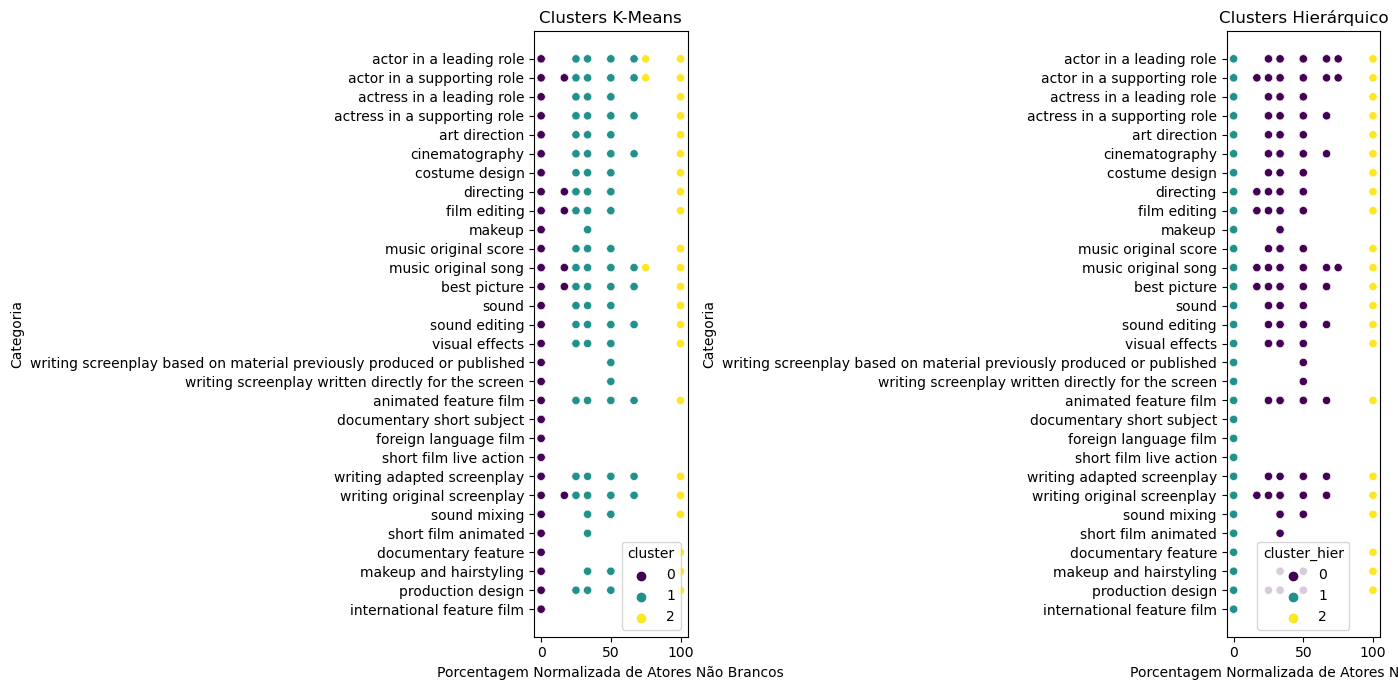

In [16]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='porcentagem_non_white', y='category', hue='cluster', palette='viridis')
plt.title('Clusters K-Means')
plt.xlabel('Porcentagem Normalizada de Atores Não Brancos')
plt.ylabel('Categoria')

plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='porcentagem_non_white', y='category', hue='cluster_hier', palette='viridis')
plt.title('Clusters Hierárquico')
plt.xlabel('Porcentagem Normalizada de Atores Não Brancos')
plt.ylabel('Categoria')

plt.tight_layout()
plt.show()
